## Exercises

1. What type of algorithm would you use to segment a company customers database into multiple groups?
I would use a clustering agorithm, such as K-means. This kind of algorithm would group similar observations in the same group or cluster.

2. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem? Explain.
I would frame spam deterction as supervised learning because there is a clear goal: spam or not spam. Unsupervised learning has no target variable to be modeled and is used to observe new patterns in datasets.

3. What is a test set, and why would you want to use it?
A test set is the portion of the dataset that you will use to test how well/effective your model is after it's trained on the training dataset.

4. You are training a classification model with 100 variables/features that achieves 95% accuracy in the training dataset. However, when you run it in the test dataset, you only get 60% accuracy. Which of the following options are valid approached to solve this problem?
E (a and c).

In [9]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt

## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)


## define csv file to read in the bucket
file_key= 'Real_Estate.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Dropping the 'No' and 'transaction_date' column

In [10]:
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis =1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## Builiding Linear Regression Model 1

In [21]:
from sklearn.model_selection import train_test_split

## defining input and target variables
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1)
Y = house_price['house_price_of_unit_area']

## splitting the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

In [22]:
## building the linear regression model
from sklearn.linear_model import LinearRegression
lm_md = LinearRegression().fit(X_train, Y_train)

In [23]:
## predicting on the testing dataset
lm_preds = lm_md.predict(X_test)
lm_preds

array([51.7413717 , 29.51080917, 12.46229439, 31.8656718 , 32.76590465,
       40.26348059, 14.36139229, 39.82634563, 35.85174574, 14.57000965,
       11.73954593, 41.28106417, 43.27314403, 39.89614275, 29.93260935,
       30.65910564, 29.45565433, 38.05798265, 45.29916806, 47.24276137,
       38.90996049, 41.88587595, 50.00313907, 31.08781976, 47.82992917,
       47.24276137, 13.07230068, 44.50856666, 25.65125672, 33.70031197,
       44.73647877, 29.16295488, 27.77472655, 40.58974394, 47.24276137,
       44.97142188, 44.67687381, 53.22068566, 42.76372087, 23.26633971,
       30.16881458, 30.41494038, 46.77735052, 37.0461214 , 51.77117418,
       45.7794203 , 38.28070972, 46.03960375, 13.80108757, 41.16185425,
       32.52781186, 43.14392064, 14.75476693, 47.63341804, 33.76346413,
       44.17801589, 46.45177835, 39.79641835, 49.56257636, 43.08021314,
       34.37713283, 46.02241711, 33.56489653, 13.52833403, 13.52833403,
       46.36237091, 51.94998906, 44.88549117, 41.92962455, 39.49

In [24]:
## calculating the MSE for model 1
np.mean((Y_test - lm_preds)**2)

107.67014792289746

In [ ]:
## the MSE for model 1 is 107.7

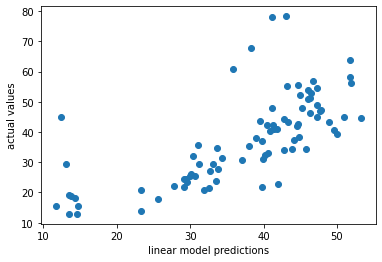

In [25]:
## visualizing results
import matplotlib.pyplot as plt
plt.scatter(lm_preds, Y_test)
plt.xlabel('linear model predictions')
plt.ylabel('actual values')
plt.show()

## Building Linear Regression Model 2

In [26]:
## defining input and target variables
X2 = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y2 = house_price['house_price_of_unit_area']

In [27]:
## building the linear regression model
lm_md_2 = LinearRegression().fit(X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1), Y_train)

In [28]:
## predicting on the testing dataset
lm_preds_2 = lm_md_2.predict(X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1))
lm_preds_2

array([52.13672941, 34.9997784 , 14.04808474, 32.90964315, 30.93865572,
       40.99770697, 16.20751495, 41.50468168, 33.89922091, 16.41968987,
       14.10312323, 39.79660716, 43.50821586, 38.10395175, 29.07623711,
       29.71353222, 28.88504546, 38.12711387, 44.43050432, 45.77404396,
       40.35922693, 41.88892037, 51.71677046, 27.59566517, 49.93163596,
       45.77404396, 14.60066712, 44.01659647, 25.75800476, 32.06253936,
       42.56899137, 29.20452909, 35.6874444 , 41.28982411, 45.77404396,
       40.73322225, 42.50836996, 54.33797449, 43.29369681, 19.65352359,
       31.74213901, 32.34626568, 44.11971679, 35.42952558, 52.16704011,
       48.247287  , 37.50231943, 47.32818531, 15.65997292, 39.67536434,
       30.57855622, 38.09475303, 16.62991542, 48.42729029, 32.95250855,
       45.09148819, 46.9001056 , 38.15053637, 49.66430643, 43.84537833,
       33.51347423, 46.50255447, 32.01454246, 15.6214332 , 15.6214332 ,
       46.80917349, 52.34890433, 42.72054488, 44.05451453, 36.45

In [29]:
## calculating the MSE for model 2
np.mean((Y_test -lm_preds_2)**2)

116.03640353082362

In [13]:
## The MSE for model 2 is 116.03

In [14]:
## Based on the MSE from both of these models, I would select the first model because the MSE value is lower.

## Reating above steps 100 times

In [30]:
MSE_results = pd.DataFrame({'md1_results': np.repeat(np.nan, 100), 'md2_results': np.repeat(np.nan, 100)})

## defining input and target variables for model 1
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1)
Y = house_price['house_price_of_unit_area']

## defining input and target variables for model 2
X2 = house_price.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
Y2 = house_price['house_price_of_unit_area']

for i in range(0,100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)
    md1 = LinearRegression().fit(X_train, Y_train)
    
    md2 = LinearRegression().fit(X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1), Y_train)
    
    ## predicting on the test dataset
    md1_preds = md1.predict(X_test)
    md2_preds = md2.predict(X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1))
    
    ## computing MSE
    mse1 = np.mean((Y_test - md1_preds)**2)
    mse2 = np.mean((Y_test - md2_preds)**2)
    MSE_results['md1_results'][i] = mse1
    MSE_results['md2_results'][i] = mse2
    
print('The mse of model 1 is: ', MSE_results['md1_results'].mean())
print('The mse of model 2 is: ', MSE_results['md2_results'].mean())
print(MSE_results)

The mse of model 1 is:  82.88036430850364
The mse of model 2 is:  89.99327149999468
    md1_results  md2_results
0     70.560730    78.825619
1     57.543602    60.992798
2    148.559814   158.592691
3     86.608218    84.969413
4    146.825124   155.569838
..          ...          ...
95    94.157511    97.733300
96    65.271271    75.360618
97    74.562154    83.331231
98    91.196396    97.825628
99    50.509376    59.642875

[100 rows x 2 columns]


In [31]:
## printing all observations
print(MSE_results.to_string())

    md1_results  md2_results
0     70.560730    78.825619
1     57.543602    60.992798
2    148.559814   158.592691
3     86.608218    84.969413
4    146.825124   155.569838
5     77.818130    80.547360
6     56.904950    70.272342
7     58.758003    61.624827
8     59.621960    60.587567
9     49.032009    57.939227
10    70.663469    73.640463
11   101.965195   106.128242
12    91.932778    89.223395
13   143.389529   155.767113
14    70.674152    66.634848
15    69.086313    73.079441
16    56.250957    66.316128
17   146.345643   156.545702
18    61.247137    66.760520
19    72.647019    77.305510
20   122.775367   134.054276
21    54.751752    65.568087
22   152.578251   164.706954
23   159.539433   169.600846
24    59.741421    66.635709
25   152.349765   163.992634
26    69.963149    73.566603
27    47.770657    58.782573
28    75.518731    78.999818
29    71.843551    73.827726
30    68.189036    79.608904
31    63.160770    66.123867
32    58.035775    63.423197
33    46.22040

### Visualizing results on a graph

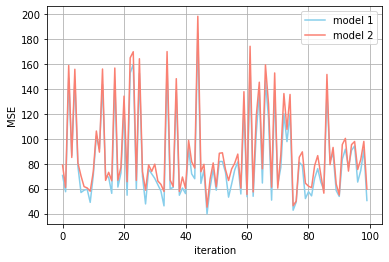

In [32]:
plt.plot(MSE_results['md1_results'], color = 'skyblue')
plt.plot(MSE_results['md2_results'], color = 'salmon')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.legend(loc = 'upper right', labels = ['model 1', 'model 2'])
plt.grid()
plt.show();

In [3]:
## df['col']

In [ ]:
## based on the MSE Results and the model averages, I would choose Model 1 because it has a lower MSE value
## on average. In the graph about, we can visuzlize that the model 1 (skyblue) has lower MSE values compared to
## model 2 (salmon).